In [ ]:
### Install Detectron2
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# Copy the general: https://github.com/matterport/Mask_RCNN

In [1]:
import torch
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.modeling import build_model
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt
import cv2
import os

#output_dir = "/work/pi_mfacette_umass_edu/lliu4_umass_edu-conda/envs/GuardSeg/detectron2/output/"
#config_yaml_path = os.path.join(output_dir, "GuardSeg_model.yaml")
# 1. Initialize Model Configuration
cfg = get_cfg()
cfg.merge_from_file("/work/pi_mfacette_umass_edu/lliu4_umass_edu-conda/envs/GuardSeg/detectron2/output/GuardSeg_model.yaml")


# 2. Load Model Weights
model = build_model(cfg)
model_weights_path = "./output/model_final.pth"

model.load_state_dict(torch.load(model_weights_path))

# 3. Create a Predictor from the Model
predictor = DefaultPredictor(cfg)

/work/pi_mfacette_umass_edu/lliu4_umass_edu-conda/envs/GuardSeg/detectron2
(440, 640, 3)


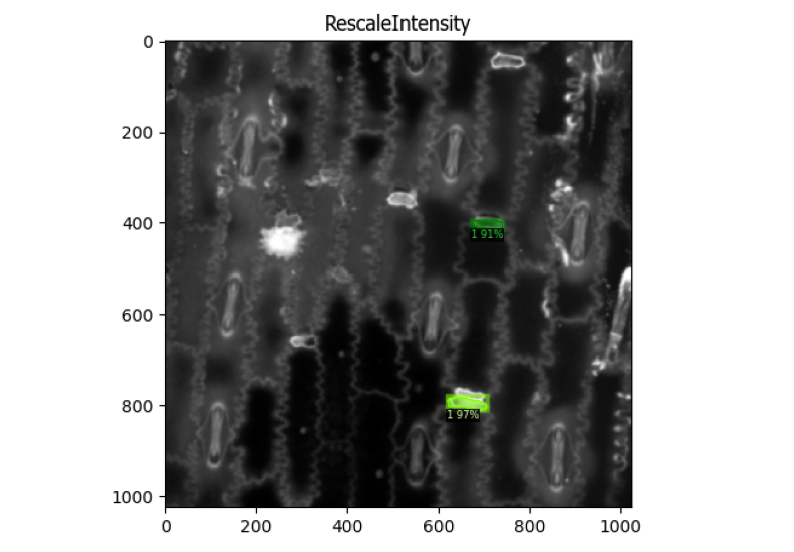

In [54]:
###Random select one image for detect, using the generated predictor
print(os.getcwd())
im = cv2.imread("/work/pi_mfacette_umass_edu/lliu4_umass_edu-conda/envs/GuardSeg/detectron2/filterd.png")

print(im.shape)
v = Visualizer(im[:, :, ::-1], scale=1)
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(10, 7))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis("off")
plt.show()

In [47]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = './samples_prediction/nia_sample/Nia_avg_projection.zip'
print(zip_file_path)
# Specify the directory where you want to extract the contents
extract_to_directory = './samples_prediction/nia_sample/Nia_avg_projection'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_to_directory)

print("Extraction complete.")



./samples_prediction/nia_sample/Nia_avg_projection.zip
Extraction complete.


In [38]:
# For Nia's samples with name "Copy of", will affect furthe analysis
import os

# Specify the directory containing the files
directory = './samples_prediction/nia_sample/Nia_avg_projection/Nia_output'

# Get a list of files in the directory
files = os.listdir(directory)

# Iterate through the files and rename them
for file_name in files:
    if file_name.startswith('Copy of '):
        # Construct the new file name by removing the "Copy of " prefix
        new_file_name = file_name.replace('Copy of ', '', 1)
        
        # Construct the full path of the original and new files
        old_path = os.path.join(directory, file_name)
        new_path = os.path.join(directory, new_file_name)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed {file_name} to {new_file_name}")
print(files)

['.DS_Store', '.ipynb_checkpoints', 'A619_1_1.png', 'A619_1_2.png', 'A619_1_3.png', 'A619_3_1.png', 'A619_3_2.png', 'A619_3_3.png', 'A619_4_1.png', 'A619_4_2.png', 'A619_4_3.png', 'A619_5_1.png', 'A619_5_2.png', 'A619_5_3.png', 'A619_6_1.png', 'A619_6_2.png', 'A619_6_3.png', 'CML247_19-2_1.png', 'CML247_19-2_2.png', 'CML247_19-2_3.png', 'CML247_19_1.png', 'CML247_19_2.png', 'CML247_19_3.png', 'CML247_4_1.png', 'CML247_4_2.png', 'CML247_4_3.png', 'CML247_5_1.png', 'CML247_5_2.png', 'CML247_5_3.png', 'CML247_6_1.png', 'CML247_6_2.png', 'CML247_6_3.png', 'CML322_4_1.png', 'CML322_4_2.png', 'CML322_4_3.png', 'CML322_6_1.png', 'CML322_6_2.png', 'CML333_3_1.png', 'CML333_3_2.png', 'CML333_3_3.png', 'CML333_4_1.png', 'CML333_4_2.png', 'CML333_4_3.png', 'CML333_5_1.png', 'CML333_5_2.png', 'CML333_8_1.png', 'CML333_8_2.png', 'CML333_8_3.png', 'CML427_4_1.png', 'CML427_4_2.png', 'CML427_4_3.png', 'CML52_1_1.png', 'CML52_1_2.png', 'CML52_1_3.png', 'CML52_6_1.png', 'CML52_6_2.png', 'CML52_6_3.png'

In [39]:
### Get the colored Mask:
import numpy as np

# Output directory for masks
# Specify the directory path

color_mask_output_directory = "./samples_prediction/nia_sample/color_mask"
overlay_color_mask_output_directory = "./samples_prediction/nia_sample/overlay_color_mask"


# Create the directories if they don't exist
for directory in [color_mask_output_directory, overlay_color_mask_output_directory]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Directory created successfully:", directory)
    else:
        print("Directory already exists:", directory)

sample_dir = "./samples_prediction/nia_sample/Nia_avg_projection/Nia_output"


file_list = [file for file in os.listdir(sample_dir) if file.endswith('.png')]
# Get the full paths of PNG files in the sample directory
full_file_paths = [os.path.join(sample_dir, file) for file in file_list if file.endswith(".png")]


Directory already exists: ./samples_prediction/nia_sample/color_mask
Directory already exists: ./samples_prediction/nia_sample/overlay_color_mask


In [40]:
num_files = len(file_list)
print(num_files)
print(file_list)

84
['A619_1_1.png', 'A619_1_2.png', 'A619_1_3.png', 'A619_3_1.png', 'A619_3_2.png', 'A619_3_3.png', 'A619_4_1.png', 'A619_4_2.png', 'A619_4_3.png', 'A619_5_1.png', 'A619_5_2.png', 'A619_5_3.png', 'A619_6_1.png', 'A619_6_2.png', 'A619_6_3.png', 'CML247_19-2_1.png', 'CML247_19-2_2.png', 'CML247_19-2_3.png', 'CML247_19_1.png', 'CML247_19_2.png', 'CML247_19_3.png', 'CML247_4_1.png', 'CML247_4_2.png', 'CML247_4_3.png', 'CML247_5_1.png', 'CML247_5_2.png', 'CML247_5_3.png', 'CML247_6_1.png', 'CML247_6_2.png', 'CML247_6_3.png', 'CML322_4_1.png', 'CML322_4_2.png', 'CML322_4_3.png', 'CML322_6_1.png', 'CML322_6_2.png', 'CML333_3_1.png', 'CML333_3_2.png', 'CML333_3_3.png', 'CML333_4_1.png', 'CML333_4_2.png', 'CML333_4_3.png', 'CML333_5_1.png', 'CML333_5_2.png', 'CML333_8_1.png', 'CML333_8_2.png', 'CML333_8_3.png', 'CML427_4_1.png', 'CML427_4_2.png', 'CML427_4_3.png', 'CML52_1_1.png', 'CML52_1_2.png', 'CML52_1_3.png', 'CML52_6_1.png', 'CML52_6_2.png', 'CML52_6_3.png', 'CML69_3_1.png', 'CML69_3_2.pn

In [41]:
file = file_list[2]
genotype = file.split('_')[0]
date = file.split('_')[1]
number = file.split('_')[2]
print(genotype)
print(date)
print(number)

A619
1
3.png


In [43]:
for file in full_file_paths:
    print(file)
    im = cv2.imread(file)
    outputs = predictor(im)
    file = os.path.basename(file)

    # Extracting genotype and date information
    genotype = file.split('_')[0]
    date = file.split('_')[1]
    number = file.split('_')[2]

    # Get indices for "GC" and "SC" classes
    gc_indices = np.where(outputs["instances"].pred_classes.cpu().numpy() == 1)[0]
    sc_indices = np.where(outputs["instances"].pred_classes.cpu().numpy() == 2)[0]

    # Initialize empty masks for "GFP" and "CFP"
    gfp_mask = np.zeros_like(outputs["instances"].pred_masks[0].cpu().numpy(), dtype=np.uint8)
    cfp_mask = np.zeros_like(outputs["instances"].pred_masks[0].cpu().numpy(), dtype=np.uint8)

    # Assign masks to "GFP" and "CFP" channels based on your criteria
    for i, mask in enumerate(outputs["instances"].pred_masks):
        # Convert mask to binary format (0 or 255)
        mask_np = (mask.cpu().numpy() * 255).astype(np.uint8)

        # Assign masks to "GFP" and "CFP" based on your criteria
        if i in gc_indices:
            gfp_mask = np.maximum(gfp_mask, mask_np)  # Combine masks for "GC" into "GFP"
        elif i in sc_indices:
            cfp_mask = np.maximum(cfp_mask, mask_np)  # Combine masks for "SC" into "CFP"
    
    # Create colored overlay
    overlay = np.zeros_like(im)

    # Green channel for "GFP"
    overlay[:, :, 1][gfp_mask > 0] = 255  

    # Red channel for "CFP"
    overlay[:, :, 2][cfp_mask > 0] = 255  

    # Save the overlay image
    overlay_filename1 = f"{genotype}_{date}_{number}_color_image.png"
    print("overlay_filename1:", overlay_filename1)
    print(overlay_color_mask_output_directory)
    overlay_path1 = os.path.join(overlay_color_mask_output_directory, overlay_filename1)
    print("overlay_path1:", overlay_path1)
    cv2.imwrite(overlay_path1, overlay)
    
    # Create colored overlays
    gfp_overlay = np.zeros_like(im)
    cfp_overlay = np.zeros_like(im)

    gfp_overlay[:, :, 1][gfp_mask > 0] = 255  # Green channel for "GFP"
    cfp_overlay[:, :, 2][cfp_mask > 0] = 255  # Red channel for "CFP"

    # Combine original image with overlays
    final_overlay = cv2.addWeighted(im, 1, gfp_overlay, 0.5, 0)
    final_overlay = cv2.addWeighted(final_overlay, 1, cfp_overlay, 0.5, 0)

    # Save the overlay image
    overlay_filename2 = f"{genotype}_{date}_{number}_overlay_image.png"
    overlay_path2 = os.path.join(color_mask_output_directory, overlay_filename2)
    cv2.imwrite(overlay_path2, final_overlay)
    
    gfp_overlay = np.zeros_like(im)
    cfp_overlay = np.zeros_like(im)

    gfp_overlay[:, :, 1][gfp_mask > 0] = 255  # Green channel for "GFP"
    cfp_overlay[:, :, 2][cfp_mask > 0] = 255  # Red channel for "CFP"

    # Combine original image with overlays
    final_overlay = cv2.addWeighted(im, 1, gfp_overlay, 0.5, 0)
    final_overlay = cv2.addWeighted(final_overlay, 1, cfp_overlay, 0.5, 0)

    # Save the overlay image
    overlay_filename2 = f"{genotype}_{date}_{number}_overlay_image.png"
    overlay_path2 = os.path.join(color_mask_output_directory, overlay_filename2)
    cv2.imwrite(overlay_path2, final_overlay)

./samples_prediction/nia_sample/Nia_avg_projection/Nia_output/A619_1_1.png
overlay_filename1: A619_1_1.png_color_image.png
./samples_prediction/nia_sample/overlay_color_mask
overlay_path1: ./samples_prediction/nia_sample/overlay_color_mask/A619_1_1.png_color_image.png
./samples_prediction/nia_sample/Nia_avg_projection/Nia_output/A619_1_2.png
overlay_filename1: A619_1_2.png_color_image.png
./samples_prediction/nia_sample/overlay_color_mask
overlay_path1: ./samples_prediction/nia_sample/overlay_color_mask/A619_1_2.png_color_image.png
./samples_prediction/nia_sample/Nia_avg_projection/Nia_output/A619_1_3.png
overlay_filename1: A619_1_3.png_color_image.png
./samples_prediction/nia_sample/overlay_color_mask
overlay_path1: ./samples_prediction/nia_sample/overlay_color_mask/A619_1_3.png_color_image.png
./samples_prediction/nia_sample/Nia_avg_projection/Nia_output/A619_3_1.png
overlay_filename1: A619_3_1.png_color_image.png
./samples_prediction/nia_sample/overlay_color_mask
overlay_path1: ./sa

In [ ]:
 # Create colored overlays
    gfp_overlay = np.zeros_like(im)
    cfp_overlay = np.zeros_like(im)

    gfp_overlay[:, :, 1][gfp_mask > 0] = 255  # Green channel for "GFP"
    cfp_overlay[:, :, 2][cfp_mask > 0] = 255  # Red channel for "CFP"

    # Combine original image with overlays
    final_overlay = cv2.addWeighted(im, 1, gfp_overlay, 0.5, 0)
    final_overlay = cv2.addWeighted(final_overlay, 1, cfp_overlay, 0.5, 0)

    # Save the overlay image
    overlay_filename2 = f"{genotype}_{date}_{number}_overlay_image.png"
    overlay_path2 = os.path.join(color_mask_output_directory, overlay_filename2)
    cv2.imwrite(overlay_path2, final_overlay)

In [24]:
mask_dir = "/work/pi_mfacette_umass_edu/lliu4_umass_edu-conda/envs/GuardSeg/detectron2/nia_sample/color_mask"
file_list = os.listdir(mask_dir)


num_files = len(file_list)
print(num_files)

45
